# Importando dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math
import plotly
import plotly.offline as py
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
selic_data = pd.read_excel("grafico.xlsx")

In [ ]:
vix_data = pd.read_csv("VXX.csv")

In [ ]:
dolar_data = pd.read_csv("BRL=X.csv")

In [ ]:
ibovespa_data = pd.read_csv("^BVSP.csv")

In [ ]:
inflacao_data = pd.read_excel("Inflacao12MesesAcum.xlsx")

# Tratando os Dados

## Tratando Dados SELIC

In [ ]:
selic_data['DateTime'] = selic_data['DateTime'].astype(np.datetime64)

In [ ]:
selic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTime              1818 non-null   datetime64[ns]
 1   Meta para taxa Selic  1818 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.5 KB


In [ ]:
selic_data.head()

,DateTime,Meta para taxa Selic
0,2017-01-13,13.0
1,2017-01-14,13.0
2,2017-01-15,13.0
3,2017-01-16,13.0
4,2017-01-17,13.0


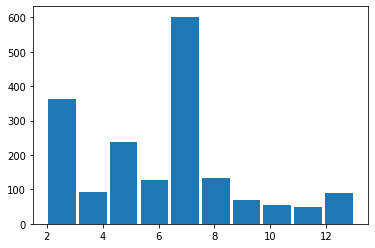

In [ ]:
plt.hist(selic_data['Meta para taxa Selic'], 10, rwidth=0.9)
plt.show()

## Tratando Dados IBOVESPA

In [ ]:
ibovespa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1242 non-null   object 
 1   Open       1234 non-null   float64
 2   High       1234 non-null   float64
 3   Low        1234 non-null   float64
 4   Close      1234 non-null   float64
 5   Adj Close  1234 non-null   float64
 6   Volume     1234 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.0+ KB


In [ ]:
ibovespa_data = ibovespa_data.drop(columns=['Open','High','Low','Volume','Adj Close'])

In [ ]:
ibovespa_data.head()

,Date,Close
0,2017-01-13,63652.0
1,2017-01-16,63831.0
2,2017-01-17,64354.0
3,2017-01-18,64150.0
4,2017-01-19,63951.0


In [ ]:
min = ibovespa_data['Close'].min()
min

60762.0

In [ ]:
max = ibovespa_data['Close'].max()
max

130776.0

In [ ]:
media = ibovespa_data.mean()
media.round(2)

Close    93505.86
dtype: float64

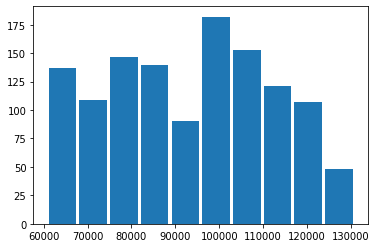

In [ ]:
plt.hist(ibovespa_data['Close'], 10, rwidth=0.9)
plt.show()

## Tratando Dados VIX

In [ ]:
vix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1000 non-null   object 
 1   Open       1000 non-null   float64
 2   High       1000 non-null   float64
 3   Low        1000 non-null   float64
 4   Close      1000 non-null   float64
 5   Adj Close  1000 non-null   float64
 6   Volume     1000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [ ]:
vix_data = vix_data.drop(columns=['Open','High','Low','Volume','Adj Close'])

In [ ]:
vix_data.head()

,Date,Close
0,2018-01-25,110.639999
1,2018-01-26,110.639999
2,2018-01-29,118.320000
3,2018-01-30,122.199997
4,2018-01-31,122.599998


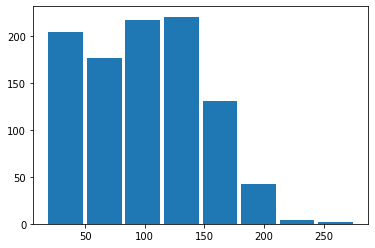

In [ ]:
plt.hist(vix_data['Close'], 8, rwidth=0.9)
plt.show()

## Tratando Dados BRLUSD

In [ ]:
dolar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1305 non-null   object 
 1   Open       1302 non-null   float64
 2   High       1302 non-null   float64
 3   Low        1302 non-null   float64
 4   Close      1302 non-null   float64
 5   Adj Close  1302 non-null   float64
 6   Volume     1302 non-null   float64
dtypes: float64(6), object(1)
memory usage: 71.5+ KB


In [ ]:
dolar_data = dolar_data.drop(columns=['Open','High','Low','Volume','Adj Close'])

In [ ]:
dolar_data.head()

,Date,Close
0,2017-01-13,3.1868
1,2017-01-16,3.1868
2,2017-01-17,3.2405
3,2017-01-18,3.2098
4,2017-01-19,3.2296


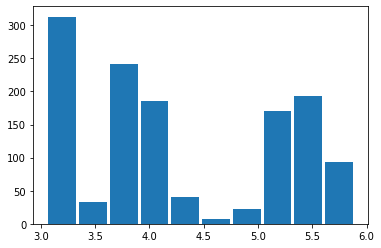

In [ ]:
plt.hist(dolar_data['Close'], 10, rwidth=0.9)
plt.show()

## Tratando Dados Inflação

In [ ]:
inflacao_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    61 non-null     datetime64[ns]
 1   Acum    61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [ ]:
inflacao_data.head()

,Date,Acum
0,2021-11-30,10.74
1,2021-10-31,10.67
2,2021-09-30,10.25
3,2021-08-31,9.68
4,2021-07-31,8.99


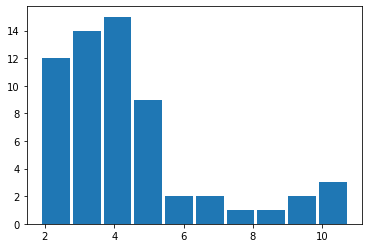

In [ ]:
plt.hist(inflacao_data['Acum'],10, rwidth=0.9)
plt.show()

# Gráficos

## Plotando os Gráficos

In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [ ]:
pio.renderers.default = "colab"

In [ ]:
import plotly.graph_objs as go

ibov= go.Scatter(x = ibovespa_data['Date'], y = ibovespa_data['Close'], name="IBOV")
vix = go.Scatter(x = vix_data['Date'], y = vix_data['Close']*500, name="VIX")
dolar = go.Scatter(x = dolar_data['Date'], y = dolar_data['Close']*10000, name="DOLAR")
selic = go.Scatter(x = selic_data['DateTime'], y = selic_data['Meta para taxa Selic']*10000, name="SELIC")
inflacao = go.Scatter(x = inflacao_data['Date'], y = inflacao_data['Acum']*10000, name="INFLACAO")

data = [ibov,vix,dolar,selic,inflacao]

layout = dict(
    title = "Valores",
    title_x = 0.5,
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                dict(count=1,
                     label = '1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')     
                           ])
        ),
        rangeslider=dict(
            visible= True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [ ]:
data2 = [selic,inflacao]
py.iplot(data2)